In [18]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt            

In [19]:
def create_array(rows: int,cols: int, pos_value_density: float) -> np.array:
    arr = np.random.rand(rows,cols)
    return (arr>1-pos_value_density).astype(float)

def is_within_distance(index: tuple,pos_val: list,distance: int) -> float:
    #manhattan distance formula
    dist = abs(index[0]-pos_val[0]) +abs(index[1]-pos_val[1])
    return 1/dist if 0<dist<=distance else 0

def detect_neighbors(init_array: np.array,pos_vals: list,distance: int):
    #create modified array for testing/debugging comparisons against init_arr
    mod_arr = init_array.copy()
    for value in pos_vals:
        arr_iterable = np.nditer(mod_arr, flags = ["multi_index"])

        for item in arr_iterable:
            if not item:
                mod_arr[arr_iterable.multi_index]=is_within_distance(arr_iterable.multi_index,value,distance)

            elif item !=1 and is_within_distance(arr_iterable.multi_index,value,distance):
                #set overlapping cells to a unique value for plotting purposes
                mod_arr[arr_iterable.multi_index]=2
    return mod_arr



In [37]:
def main(rows,cols,distance,pos_value_density=0.01):

    init_arr = create_array(rows,cols,pos_value_density)

    pos_vals = np.dstack(np.where(init_arr>0))[0]

    neighbors=detect_neighbors(init_arr,pos_vals,distance)

    count= np.count_nonzero(neighbors)
    overlaps  = np.count_nonzero(neighbors[neighbors==2])

    print(f'Total Neighbor Detections: {count}')
    print(f'Total Overlap Detections: {overlaps}')

    sns.heatmap(neighbors)
    plt.show()

    return neighbors

Total Neighbor Detections: 20
Total Overlap Detections: 8


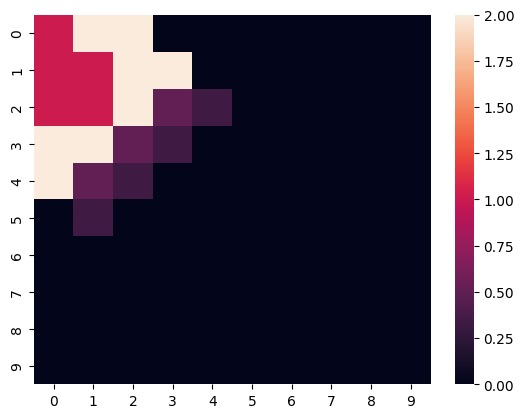

In [38]:
output = main(10,10,3,.01)

In [36]:
np.count_nonzero(ouput[ouput==2])

6

In [25]:
neighbors

NameError: name 'neighbors' is not defined